In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import ConvLSTM2D
from keras.utils import to_categorical
import pickle
import os


In [107]:
# Parameters used in saving the file
experiment_name = "test"  # Replace with your actual experiment name
file_label = "auto_RadarSeq"
file_time = "Jun-20-00-50-36"  # Replace with the actual time string when the file was saved
file_dir = "data/Test/2024_Jun/"  # Replace with the actual directory path

# Construct the filename
file_name = f"{experiment_name}_{file_label}_{file_time}"
file_path = os.path.join(file_dir, file_name)

# Load the data from the pickle file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [108]:
print(data)

[{'IWR1843_Ori': array([[-6.5430e-02,  5.0537e-01,  1.1211e+00,  0.0000e+00,  1.1100e+02],
       [ 1.9089e-02,  5.8838e-01,  1.1621e+00,  0.0000e+00,  7.5000e+01],
       [ 4.9072e-01,  6.7188e-01,  1.2627e+00,  0.0000e+00,  9.7000e+01],
       [-5.3320e-01,  8.0518e-01,  1.2734e+00,  0.0000e+00,  1.3200e+02],
       [ 6.2695e-01,  7.8027e-01,  1.0703e+00,  0.0000e+00,  1.3200e+02],
       [ 1.1250e+00,  2.1016e+00,  1.2686e+00,  0.0000e+00,  8.7000e+01],
       [ 1.4990e-01,  1.0088e+00, -1.1719e+00,  0.0000e+00,  8.7000e+01],
       [-3.4004e+00,  1.2539e+00,  1.9707e+00,  0.0000e+00,  7.1000e+01],
       [-3.7617e+00,  1.3896e+00,  1.1357e+00,  0.0000e+00,  1.0700e+02],
       [-2.3125e+00,  3.9219e+00,  1.8125e+00,  0.0000e+00,  2.1300e+02],
       [-2.7227e+00,  3.8320e+00,  2.1602e+00,  0.0000e+00,  1.0900e+02],
       [-6.5430e-02,  4.8950e-01,  1.1738e+00,  0.0000e+00,  1.1700e+02],
       [-2.6172e-01,  3.0811e-01,  6.6748e-01,  0.0000e+00,  1.1700e+02],
       [-8.1787e-02, 

In [109]:
df = pd.DataFrame(data)
print(df)
df.shape


                                            IWR1843_Ori
0     [[-0.0654, 0.5054, 1.121, 0.0, 111.0], [0.0190...
1     [[-0.0654, 0.4895, 1.174, 0.0, 117.0], [-0.261...
2     [[-0.0654, 0.512, 1.084, 0.0, 161.0], [0.4907,...
3     [[-0.09814, 0.511, 1.057, 0.0, 153.0], [0.4907...
4     [[-0.0818, 0.5117, 0.927, 0.0, 93.0], [0.0218,...
...                                                 ...
1033  [[0.1527, 0.5884, 1.059, 0.0, 150.0], [0.4907,...
1034  [[0.1335, 0.592, 1.07, 0.0, 151.0], [0.4907, 0...
1035  [[0.1335, 0.582, 1.129, 0.0, 152.0], [-0.0954,...
1036  [[0.1335, 0.5854, 1.11, 0.0, 149.0], [-0.0954,...
1037  [[0.1145, 0.5854, 1.131, 0.0, 159.0], [0.4634,...

[1038 rows x 1 columns]


(1038, 1)

In [110]:
df.columns

Index(['IWR1843_Ori'], dtype='object')

In [111]:
df['label'] = 'Sitting'

In [112]:
print(df)

                                            IWR1843_Ori    label
0     [[-0.0654, 0.5054, 1.121, 0.0, 111.0], [0.0190...  Sitting
1     [[-0.0654, 0.4895, 1.174, 0.0, 117.0], [-0.261...  Sitting
2     [[-0.0654, 0.512, 1.084, 0.0, 161.0], [0.4907,...  Sitting
3     [[-0.09814, 0.511, 1.057, 0.0, 153.0], [0.4907...  Sitting
4     [[-0.0818, 0.5117, 0.927, 0.0, 93.0], [0.0218,...  Sitting
...                                                 ...      ...
1033  [[0.1527, 0.5884, 1.059, 0.0, 150.0], [0.4907,...  Sitting
1034  [[0.1335, 0.592, 1.07, 0.0, 151.0], [0.4907, 0...  Sitting
1035  [[0.1335, 0.582, 1.129, 0.0, 152.0], [-0.0954,...  Sitting
1036  [[0.1335, 0.5854, 1.11, 0.0, 149.0], [-0.0954,...  Sitting
1037  [[0.1145, 0.5854, 1.131, 0.0, 159.0], [0.4634,...  Sitting

[1038 rows x 2 columns]


In [33]:
# df = pd.DataFrame(raw_data, columns=['x-pos', 'y-pos', 'z-pos', 'velocity', 'energy'])
# label = 'na'
# print(df)

        x-pos     y-pos     z-pos  velocity  energy
0   -0.065430  0.505371  1.121094       0.0   111.0
1    0.019089  0.588379  1.162109       0.0    75.0
2    0.490723  0.671875  1.262695       0.0    97.0
3   -0.533203  0.805176  1.273438       0.0   132.0
4    0.626953  0.780273  1.070312       0.0   132.0
..        ...       ...       ...       ...     ...
101  1.049805  2.142578  1.244141       0.0    84.0
102  0.224976  0.849609 -1.232422       0.0    84.0
103 -3.636719  1.679688  1.239258       0.0   112.0
104 -2.312500  3.914062  1.845703       0.0   204.0
105 -2.875000  3.695312  2.234375       0.0   103.0

[106 rows x 5 columns]


In [11]:
activities = {
    1: 'Sitting',
    2: 'Standing',
    3: 'Laying'
}

In [12]:
print(df.shape)

(1038, 2)


In [34]:
print(df)

                                            IWR1843_Ori    label
0     [[-0.0654, 0.5054, 1.121, 0.0, 111.0], [0.0190...  Sitting
1     [[-0.0654, 0.4895, 1.174, 0.0, 117.0], [-0.261...  Sitting
2     [[-0.0654, 0.512, 1.084, 0.0, 161.0], [0.4907,...  Sitting
3     [[-0.09814, 0.511, 1.057, 0.0, 153.0], [0.4907...  Sitting
4     [[-0.0818, 0.5117, 0.927, 0.0, 93.0], [0.0218,...  Sitting
...                                                 ...      ...
1033  [[0.1527, 0.5884, 1.059, 0.0, 150.0], [0.4907,...  Sitting
1034  [[0.1335, 0.592, 1.07, 0.0, 151.0], [0.4907, 0...  Sitting
1035  [[0.1335, 0.582, 1.129, 0.0, 152.0], [-0.0954,...  Sitting
1036  [[0.1335, 0.5854, 1.11, 0.0, 149.0], [-0.0954,...  Sitting
1037  [[0.1145, 0.5854, 1.131, 0.0, 159.0], [0.4634,...  Sitting

[1038 rows x 2 columns]


In [13]:
# Split the DataFrame into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [113]:
Y_train = train_df["label"]
X_train = train_df.drop(labels = ["label"],axis = 1) 
dataset = df


In [114]:
print(X_train)

                                           IWR1843_Ori
950  [[-0.11993, 0.4548, 1.095, 0.0, 135.0], [0.327...
405  [[-0.105, 0.4568, 1.103, 0.0, 94.0], [0.07635,...
514  [[-0.1499, 0.4543, 1.035, 0.0, 86.0], [0.1145,...
411  [[-0.08997, 0.4607, 1.1, 0.0, 87.0], [0.03543,...
493  [[-0.05997, 0.4473, 1.163, 0.0, 68.0], [0.0531...
..                                                 ...
87   [[-0.04907, 0.5073, 1.118, 0.0, 164.0], [0.490...
330  [[-0.1091, 0.4167, 1.068, 0.0, 75.0], [0.1527,...
466  [[0.2454, 0.6064, 1.016, 0.0, 93.0], [0.02045,...
121  [[-0.0654, 0.5176, 1.041, 0.0, 109.0], [0.1145...
860  [[-0.135, 0.4521, 1.086, 0.0, 131.0], [0.10223...

[830 rows x 1 columns]


In [120]:
print(dataset)

                                            IWR1843_Ori    label
0     [[-0.0654, 0.5054, 1.121, 0.0, 111.0], [0.0190...  Sitting
1     [[-0.0654, 0.4895, 1.174, 0.0, 117.0], [-0.261...  Sitting
2     [[-0.0654, 0.512, 1.084, 0.0, 161.0], [0.4907,...  Sitting
3     [[-0.09814, 0.511, 1.057, 0.0, 153.0], [0.4907...  Sitting
4     [[-0.0818, 0.5117, 0.927, 0.0, 93.0], [0.0218,...  Sitting
...                                                 ...      ...
1033  [[0.1527, 0.5884, 1.059, 0.0, 150.0], [0.4907,...  Sitting
1034  [[0.1335, 0.592, 1.07, 0.0, 151.0], [0.4907, 0...  Sitting
1035  [[0.1335, 0.582, 1.129, 0.0, 152.0], [-0.0954,...  Sitting
1036  [[0.1335, 0.5854, 1.11, 0.0, 149.0], [-0.0954,...  Sitting
1037  [[0.1145, 0.5854, 1.131, 0.0, 159.0], [0.4634,...  Sitting

[1038 rows x 2 columns]


In [124]:
first_1_samples = dataset['IWR1843_Ori'].iloc[:1]
first_5_samples = dataset['IWR1843_Ori'].iloc[0:5]

In [125]:
print(first_5_samples)

0    [[-0.0654, 0.5054, 1.121, 0.0, 111.0], [0.0190...
1    [[-0.0654, 0.4895, 1.174, 0.0, 117.0], [-0.261...
2    [[-0.0654, 0.512, 1.084, 0.0, 161.0], [0.4907,...
3    [[-0.09814, 0.511, 1.057, 0.0, 153.0], [0.4907...
4    [[-0.0818, 0.5117, 0.927, 0.0, 93.0], [0.0218,...
Name: IWR1843_Ori, dtype: object


In [126]:
xyz_coordinates = [sample[:, :3] for sample in first_5_samples]
print(xyz_coordinates)

[array([[-0.0654 ,  0.5054 ,  1.121  ],
       [ 0.01909,  0.5884 ,  1.162  ],
       [ 0.4907 ,  0.672  ,  1.263  ],
       [-0.533  ,  0.805  ,  1.273  ],
       [ 0.627  ,  0.7803 ,  1.07   ],
       [ 1.125  ,  2.102  ,  1.269  ],
       [ 0.1499 ,  1.009  , -1.172  ],
       [-3.4    ,  1.254  ,  1.971  ],
       [-3.762  ,  1.39   ,  1.136  ],
       [-2.312  ,  3.922  ,  1.8125 ],
       [-2.723  ,  3.832  ,  2.16   ],
       [-0.0654 ,  0.4895 ,  1.174  ],
       [-0.2617 ,  0.308  ,  0.6675 ],
       [-0.0818 ,  0.599  ,  1.25   ],
       [ 0.3682 ,  0.541  ,  0.9937 ],
       [ 0.4907 ,  0.67   ,  1.268  ],
       [-0.5996 ,  0.685  ,  1.303  ],
       [ 0.5996 ,  0.7236 ,  0.8057 ],
       [ 1.125  ,  2.107  ,  1.226  ],
       [ 0.1499 ,  1.154  , -1.098  ],
       [-3.4    ,  1.192  ,  2.047  ],
       [-3.762  ,  1.392  ,  1.12   ],
       [-2.312  ,  3.918  ,  1.824  ],
       [-2.723  ,  3.83   ,  2.168  ],
       [-0.0654 ,  0.512  ,  1.084  ],
       [ 0.4907 ,  0.696

In [127]:
# Parameters used in saving the file
experiment_name = "test_sitting"  # Replace with your actual experiment name
file_label = "auto_RadarSeq"
file_time = "Jul-23-00-50-36"  # Replace with the actual time string when the file was saved
file_dir = "data/Test/2024_Jul/"  # Replace with the actual directory path
file_class = df['label']

In [129]:
for i, array in enumerate(xyz_coordinates):
    df = pd.DataFrame(array, columns=['X', 'Y', 'Z'])
    print(df)

    # Construct the filename
    file_name = f"{experiment_name}_{file_label}_{file_time}_{i}"
    file_path = os.path.join(file_dir, file_name)
    df.to_pickle(file_path)

            X         Y         Z
0   -0.065430  0.505371  1.121094
1    0.019089  0.588379  1.162109
2    0.490723  0.671875  1.262695
3   -0.533203  0.805176  1.273438
4    0.626953  0.780273  1.070312
..        ...       ...       ...
101  1.049805  2.142578  1.244141
102  0.224976  0.849609 -1.232422
103 -3.636719  1.679688  1.239258
104 -2.312500  3.914062  1.845703
105 -2.875000  3.695312  2.234375

[106 rows x 3 columns]
            X         Y         Z
0   -0.065430  0.489502  1.173828
1   -0.261719  0.308105  0.667480
2   -0.081787  0.599121  1.250000
3    0.368164  0.541016  0.993652
4    0.490723  0.669922  1.267578
..        ...       ...       ...
100  1.717773  2.425781  1.703125
101 -3.517578  0.953125  1.892578
102 -3.636719  1.694336  1.093750
103 -2.312500  3.910156  1.863281
104 -2.875000  3.712891  2.181641

[105 rows x 3 columns]
            X         Y         Z
0   -0.065430  0.512207  1.083984
1    0.490723  0.695801  1.189453
2   -0.599609  0.689453  1.292969


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

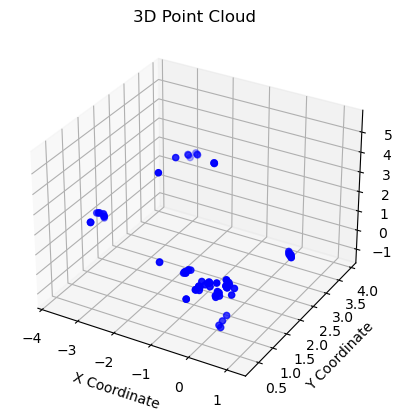

In [76]:
# Create a new figure for the plot
fig = plt.figure()

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Scatter plot using the X, Y, and Z coordinates
ax.scatter(processed_df['X'], processed_df['Y'], processed_df['Z'], c='b', marker='o')

# Label the axes
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.set_zlabel('Z Coordinate')

# Set title
ax.set_title('3D Point Cloud')

# Show the plot
plt.show()


In [13]:
DATA_DIR = "data/Testing"
def parse_dataset(num_points=100):
    train_points = []
    train_labels = []
    test_points = []
    test_labels = []
    class_map = {}
    folders = glob.glob(os.path.join(DATA_DIR, "[!README]*"))

    for i, folder in enumerate(folders):
        print("processing class: {}".format(os.path.basename(folder)))
        # store folder name with ID so we can retrieve later
        class_map[i] = folder.split("/")[-1]
        # gather all files
        train_files = glob.glob(os.path.join(folder, "train/*"))
        test_files = glob.glob(os.path.join(folder, "test/*"))

        for f in train_files:
            with open(f, 'rb') as file:
                data = pickle.load(file)
                print(data)
                print("loaded: {}".format(f))
                print(num_points)
                sampled_data = data.sample(num_points).to_numpy()
                train_points.append(sampled_data)
                train_labels.append(i)

        for f in test_files:
            with open(f, 'rb') as file:
                data = pickle.load(file)
                print(data)
                print("loaded: {}".format(f))
                print(num_points)
                sampled_data = data.sample(num_points).to_numpy()
                test_points.append(sampled_data)
                test_labels.append(i)

    return (
        np.array(train_points),
        np.array(test_points),
        np.array(train_labels),
        np.array(test_labels),
        class_map,
    )

In [14]:
import glob
import os

In [15]:
NUM_POINTS = 100
NUM_CLASSES = 1
BATCH_SIZE = 32

train_points, test_points, train_labels, test_labels, CLASS_MAP = parse_dataset(
    NUM_POINTS
)

processing class: stand
            X         Y         Z
0   -0.098145  0.511230  1.056641
1    0.490723  0.698730  1.179688
2   -0.564453  0.769531  1.309570
3    1.049805  2.150391  1.169922
4   -3.636719  1.692383  1.117188
..        ...       ...       ...
99   0.299805  0.715820  3.269531
100 -3.400391  1.214844  2.019531
101 -3.636719  1.693359  1.098633
102 -2.312500  3.912109  1.856445
103 -2.722656  3.769531  2.343750

[104 rows x 3 columns]
loaded: data/Testing/stand/train/test_sitting_auto_RadarSeq_Jul-23-00-50-36_3
100
            X         Y         Z
0   -0.081787  0.511719  0.926758
1    0.021805  0.688965  1.108398
2    0.414307  0.550293  0.887207
3    0.490723  0.697266  1.185547
4    0.218140  0.767578  0.647949
..        ...       ...       ...
102  1.125000  2.105469  1.236328
103 -3.400391  1.181641  2.058594
104 -3.636719  1.696289  1.034180
105 -2.457031  3.841797  1.761719
106 -2.722656  3.818359  2.201172

[107 rows x 3 columns]
loaded: data/Testing/stand/tra

In [16]:
print(CLASS_MAP)

{0: 'stand'}


In [17]:
print(train_points)

[[[ 0.4907   0.6924   1.202  ]
  [-3.637    1.68     1.239  ]
  [ 0.4907   0.698    1.181  ]
  [-3.637    1.694    1.079  ]
  [ 0.1145   0.577    1.163  ]
  [-0.09814  0.511    1.057  ]
  [-1.473    0.935    0.949  ]
  [ 1.125    2.12     1.034  ]
  [ 0.3066   0.553    0.832  ]
  [-0.0954   0.417    1.086  ]
  [-2.723    3.77     2.344  ]
  [ 0.4907   0.6987   1.18   ]
  [ 1.05     2.152    1.139  ]
  [-0.2617   0.308    0.6675 ]
  [-1.473    0.936    0.9746 ]
  [-0.0654   0.493    1.163  ]
  [ 0.4797   0.779    1.29   ]
  [-2.875    3.713    2.182  ]
  [ 1.05     2.148    1.19   ]
  [-3.4      1.402    1.74   ]
  [ 0.1227   0.6323   1.114  ]
  [-3.637    1.692    1.117  ]
  [-2.312    3.912    1.857  ]
  [ 1.05     2.15     1.17   ]
  [ 0.45     0.4094   1.742  ]
  [-3.637    1.693    1.106  ]
  [-3.637    1.693    1.099  ]
  [-2.572    3.932    2.172  ]
  [-2.312    3.92     1.818  ]
  [ 0.4143   0.5503   0.887  ]
  [ 0.42     0.784    1.359  ]
  [ 0.45     0.8247   1.195  ]
  [-2.31

In [18]:
from tensorflow import data as tf_data
import keras

keras.utils.set_random_seed(seed=42)

In [20]:
def augment(points, label):
    # jitter points
    points += tf.random.uniform(points.shape, -0.005, 0.005, dtype="float16")
    # shuffle points
    points = tf.random.shuffle(points)
    return points, label


train_size = 0.8
dataset = tf_data.Dataset.from_tensor_slices((train_points, train_labels))
test_dataset = tf_data.Dataset.from_tensor_slices((test_points, test_labels))
train_dataset_size = int(len(dataset) * train_size)

dataset = dataset.shuffle(len(train_points)).map(augment)
test_dataset = test_dataset.shuffle(len(test_points)).batch(BATCH_SIZE)

train_dataset = dataset.take(train_dataset_size).batch(BATCH_SIZE)
validation_dataset = dataset.skip(train_dataset_size).batch(BATCH_SIZE)

In [21]:
def conv_bn(x, filters):
    x = layers.Conv1D(filters, kernel_size=1, padding="valid")(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)


def dense_bn(x, filters):
    x = layers.Dense(filters)(x)
    x = layers.BatchNormalization(momentum=0.0)(x)
    return layers.Activation("relu")(x)

In [22]:
class OrthogonalRegularizer(keras.regularizers.Regularizer):
    def __init__(self, num_features, l2reg=0.001):
        self.num_features = num_features
        self.l2reg = l2reg
        self.eye = ops.eye(num_features)

    def __call__(self, x):
        x = ops.reshape(x, (-1, self.num_features, self.num_features))
        xxt = ops.tensordot(x, x, axes=(2, 2))
        xxt = ops.reshape(xxt, (-1, self.num_features, self.num_features))
        return ops.sum(self.l2reg * ops.square(xxt - self.eye))

In [23]:
def tnet(inputs, num_features):
    # Initialise bias as the identity matrix
    bias = keras.initializers.Constant(np.eye(num_features).flatten())
    reg = OrthogonalRegularizer(num_features)

    x = conv_bn(inputs, 32)
    x = conv_bn(x, 64)
    x = conv_bn(x, 512)
    x = layers.GlobalMaxPooling1D()(x)
    x = dense_bn(x, 256)
    x = dense_bn(x, 128)
    x = layers.Dense(
        num_features * num_features,
        kernel_initializer="zeros",
        bias_initializer=bias,
        activity_regularizer=reg,
    )(x)
    feat_T = layers.Reshape((num_features, num_features))(x)
    # Apply affine transformation to input features
    return layers.Dot(axes=(2, 1))([inputs, feat_T])

In [26]:
import keras
import tensorflow as tf
print(keras.__version__)
print(tf.__version__)
from keras import ops
from keras import layers

3.4.1
2.17.0


In [27]:
inputs = keras.Input(shape=(NUM_POINTS, 3))

x = tnet(inputs, 3)
x = conv_bn(x, 32)
x = conv_bn(x, 32)
x = tnet(x, 32)
x = conv_bn(x, 32)
x = conv_bn(x, 64)
x = conv_bn(x, 512)
x = layers.GlobalMaxPooling1D()(x)
x = dense_bn(x, 256)
x = layers.Dropout(0.3)(x)
x = dense_bn(x, 128)
x = layers.Dropout(0.3)(x)

outputs = layers.Dense(NUM_CLASSES, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs, name="pointnet")
model.summary()

Model: "pointnet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 3)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 100, 32)   │        128 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 100, 32)   │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 100, 32)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 100, 64)   │      2,112 │ activation[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 64)   │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 100, 64)   │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 100, 512)  │     33,280 │ activation_1[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 100, 512)  │      2,048 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 100, 512)  │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 512)       │          0 │ activation_2[0][… │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 256)       │    131,328 │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256)       │      1,024 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 256)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 128)       │     32,896 │ activation_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128)       │        512 │ dense_1[0][0]     │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 128)       │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 9)         │      1,161 │ activation_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 3, 3)      │          0 │ dense_2[0][0]   

 Total params: 747,818 (2.85 MB)

 Trainable params: 741,738 (2.83 MB)

 Non-trainable params: 6,080 (23.75 KB)

In [28]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["sparse_categorical_accuracy"],
)

model.fit(train_dataset, epochs=20, validation_data=validation_dataset)

Epoch 1/20


/Users/katiezhou/mambaforge/envs/py38/lib/python3.10/site-packages/keras/src/ops/nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.2640 - sparse_categorical_accuracy: 1.0000 - val_loss: 173651.4844 - val_sparse_categorical_accuracy: 1.0000
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.2164 - sparse_categorical_accuracy: 1.0000 - val_loss: 24528027648.0000 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1960 - sparse_categorical_accuracy: 1.0000 - val_loss: 51412628.0000 - val_sparse_categorical_accuracy: 1.0000
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1841 - sparse_categorical_accuracy: 1.0000 - val_loss: 2672.6763 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1608 - sparse_categorical_accuracy: 1.0000 - val_loss: 7069.2847 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1497 - sparse_categorical_accuracy: 1.0000 - val_loss: 15312.3691 - val_sparse_categorical_accuracy: 1.0000
Epo

In [30]:
from matplotlib import pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[[[-0.0654   0.512    1.084  ]
  [-2.723    3.83     2.168  ]
  [-0.0654   0.5054   1.121  ]
  [ 0.4907   0.698    1.181  ]
  [ 1.05     2.129    1.348  ]
  [-2.312    3.91     1.867  ]
  [-3.4      1.402    1.74   ]
  [-0.0954   0.4182   1.079  ]
  [-2.312    3.92     1.818  ]
  [ 0.2181   0.7676   0.648  ]
  [ 0.4907   0.67     1.268  ]
  [-3.4      1.254    1.971  ]
  [-2.723    3.812    2.219  ]
  [-3.4      1.192    2.047  ]
  [ 0.4634   0.7344   1.085  ]
  [-3.762    1.39     1.136  ]
  [-0.2617   0.308    0.6675 ]
  [ 1.05     2.143    1.244  ]
  [ 0.45     0.845    1.065  ]
  [ 0.4907   0.713    1.11   ]
  [-2.723    3.77     2.346  ]
  [ 0.5996   0.7236   0.8057 ]
  [-3.637    1.696    1.028  ]
  [ 0.3682   0.541    0.9937 ]
  [-1.473    0.936    0.9746 ]
  [-2.312    3.91     1.863  ]
  [-0.5996   0.6855   1.302  ]
  [-0.0818   0.599    1.25   ]
  [-2.875    3.697    2.227  ]
  [-2.312    3.91     1.86   ]
  [-0.0654   0.4895   1.174  ]
 

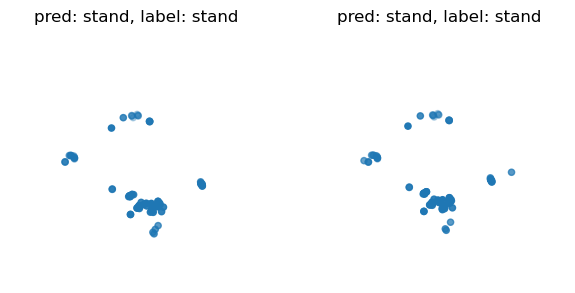

In [39]:
data = test_dataset.take(1)

points, labels = list(data)[0]
points = points[:8, ...]
labels = labels[:8, ...]

# run test data through model
preds = model.predict(points)
preds = ops.argmax(preds, -1)

points = points.numpy()
print(points)

# plot points with predicted class and label
fig = plt.figure(figsize=(15, 10))
for i in range(2):
    ax = fig.add_subplot(2, 4, i + 1, projection="3d")
    ax.scatter(points[i, :, 0], points[i, :, 1], points[i, :, 2])
    ax.set_title(
        "pred: {:}, label: {:}".format(
            CLASS_MAP[preds[i].numpy()], CLASS_MAP[labels.numpy()[i]]
        )
    )
    ax.set_axis_off()
plt.show()